## Inicializacion de variables y datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_fallecidos = pd.read_csv('./../data/fallecidos_covid.csv',encoding =('ISO-8859-1'),low_memory =False)
df_fallecidos.head()

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,a3f91b4893446f471ec1c079f28ba20b,20200602,1,MASCULINO,20190205.0,LIMA,LIMA,LA VICTORIA
1,8960c1b9f3c9289271b41c4a7c0d33f6,20200602,41,MASCULINO,19780811.0,LIMA,LIMA,VILLA EL SALVADOR
2,36497739152c2ae26703c1eca9acf537,20200602,72,MASCULINO,19471001.0,ANCASH,SANTA,NUEVO CHIMBOTE
3,627171bd69f18c257468bca6cb0aeff0,20200602,49,MASCULINO,19700910.0,ANCASH,SANTA,CHIMBOTE
4,2b20dcb481a39590c87752156e2a9e32,20200602,26,MASCULINO,19931017.0,LIMA,LIMA,LOS OLIVOS


## Conocimiento del dataset

In [3]:
df_fallecidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26658 entries, 0 to 26657
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UUID                 26658 non-null  object 
 1   FECHA_FALLECIMIENTO  26658 non-null  int64  
 2   EDAD_DECLARADA       26658 non-null  int64  
 3   SEXO                 26658 non-null  object 
 4   FECHA_NAC            25389 non-null  float64
 5   DEPARTAMENTO         26658 non-null  object 
 6   PROVINCIA            25379 non-null  object 
 7   DISTRITO             25909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB


# 1. Analisis de los datos 

### A) Promedio de edad de fallecidos por departamento

In [16]:
#Promedio de edad de fallecidos por departamento

depa_edad = df_fallecidos.groupby('DEPARTAMENTO').mean().reset_index()
depa_edad = depa_edad[['DEPARTAMENTO','EDAD_DECLARADA']]

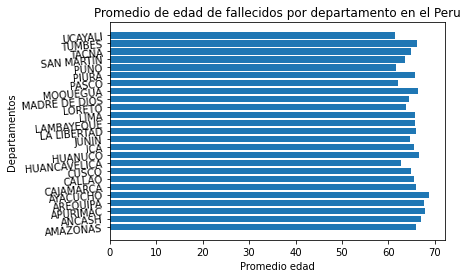

In [26]:
# Grafico de los datos obtenidos

plt.title("Promedio de edad de fallecidos por departamento en el Peru")
plt.ylabel("Departamentos")
plt.yticks(rotation = 4) 
plt.xlabel("Promedio edad")

plt.barh(depa_edad['DEPARTAMENTO'], depa_edad['EDAD_DECLARADA'])
plt.show()

### B) Fallecidos por genero 

In [11]:
contador_gen = df_fallecidos.groupby('SEXO').count().reset_index()

columnas_borrar = ['UUID','FECHA_FALLECIMIENTO','EDAD_DECLARADA', 'FECHA_NAC', 'DEPARTAMENTO', 'PROVINCIA']

contador_gen = contador_gen.drop(columns = columnas_borrar) 

contador_gen = contador_gen.rename(columns={'DISTRITO':'CANTIDAD'})

contador_gen

,SEXO,CANTIDAD
0,FEMENINO,7675
1,MASCULINO,18234


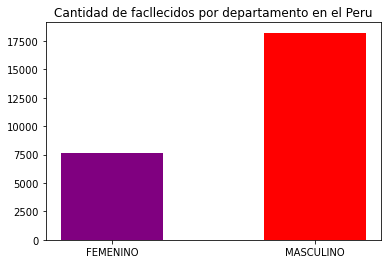

In [27]:
plt.title("Cantidad de facllecidos por departamento en el Peru")

plt.bar(contador_gen['SEXO'], contador_gen['CANTIDAD'], 0.5, color = ['purple', 'red'])

plt.show()

### C) Fallecidos por edad

In [39]:
fallecidos_edad = df_fallecidos.groupby(['EDAD_DECLARADA']).count().reset_index()

fallecidos_edad['CANT_CONTAGIADOS'] = fallecidos_edad['DISTRITO']

columnas_borrar = ['UUID','FECHA_FALLECIMIENTO', 'FECHA_NAC', 'DEPARTAMENTO', 'PROVINCIA', 'SEXO', 'DISTRITO']

fallecidos_edad = fallecidos_edad.drop(columns = columnas_borrar) 

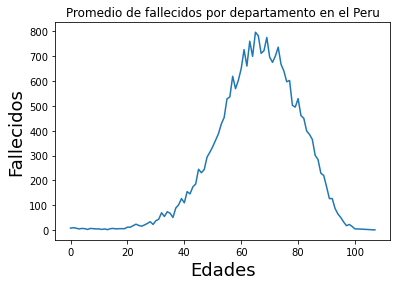

In [40]:
plt.title("Promedio de fallecidos por departamento en el Peru")

plt.xlabel("Edades", size = 18)
plt.ylabel("Fallecidos", size = 18)
plt.plot(fallecidos_edad['EDAD_DECLARADA'], fallecidos_edad['CANT_CONTAGIADOS'])
plt.show()

### D) Fallecidos por genero segun el departamento

In [43]:
fallecidos_gen_depar = df_fallecidos.groupby(['DEPARTAMENTO', 'SEXO']).count().reset_index()

fallecidos_gen_depar['FALLECIDOS'] = fallecidos_gen_depar['UUID']

columnas_borrar = ['UUID', 'PROVINCIA', 'DISTRITO', 'FECHA_FALLECIMIENTO', 'EDAD_DECLARADA', 'FECHA_NAC']

fallecidos_gen_depar = fallecidos_gen_depar.drop(columns = columnas_borrar) 
fallecidos_gen_depar

,DEPARTAMENTO,SEXO,FALLECIDOS
0,AMAZONAS,FEMENINO,39
1,AMAZONAS,MASCULINO,147
2,ANCASH,FEMENINO,339
3,ANCASH,MASCULINO,770
4,APURIMAC,FEMENINO,25
5,APURIMAC,MASCULINO,30
6,AREQUIPA,FEMENINO,298
7,AREQUIPA,MASCULINO,725
8,AYACUCHO,FEMENINO,48
9,AYACUCHO,MASCULINO,127


In [45]:
falle_gen_depar_fem = fallecidos_gen_depar[fallecidos_gen_depar['SEXO'] == 'FEMENINO'].reset_index()
falle_gen_depar_fem = falle_gen_depar_fem.drop(columns ='index')
falle_gen_depar_mas = fallecidos_gen_depar[fallecidos_gen_depar['SEXO'] == 'MASCULINO'].reset_index()
falle_gen_depar_mas = falle_gen_depar_mas.drop(columns ='index')

In [46]:
falle_gen_depar_mas

,DEPARTAMENTO,SEXO,FALLECIDOS
0,AMAZONAS,MASCULINO,147
1,ANCASH,MASCULINO,770
2,APURIMAC,MASCULINO,30
3,AREQUIPA,MASCULINO,725
4,AYACUCHO,MASCULINO,127
5,CAJAMARCA,MASCULINO,259
6,CALLAO,MASCULINO,1023
7,CUSCO,MASCULINO,159
8,HUANCAVELICA,MASCULINO,42
9,HUANUCO,MASCULINO,183


In [47]:
falle_gen_depar_fem

,DEPARTAMENTO,SEXO,FALLECIDOS
0,AMAZONAS,FEMENINO,39
1,ANCASH,FEMENINO,339
2,APURIMAC,FEMENINO,25
3,AREQUIPA,FEMENINO,298
4,AYACUCHO,FEMENINO,48
5,CAJAMARCA,FEMENINO,97
6,CALLAO,FEMENINO,463
7,CUSCO,FEMENINO,59
8,HUANCAVELICA,FEMENINO,19
9,HUANUCO,FEMENINO,113


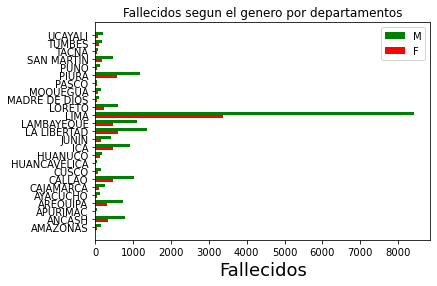

In [49]:
plt.title("Fallecidos segun el genero por departamentos")

width = 0.35
labels = falle_gen_depar_fem['DEPARTAMENTO']
x = np.arange(len(labels))

plt.barh(x + width/2, falle_gen_depar_mas['FALLECIDOS'], width, label='M', color = 'green')
plt.barh(x - width/2, falle_gen_depar_fem['FALLECIDOS'], width, label='F', color = 'red')

plt.yticks(x, labels)
plt.xlabel("Fallecidos", size = 18)

plt.legend()

plt.show()